# Lec-41 

To check the performance of the logistic regression model. 1) Confusion Matrix  2) ROC And check whether the model developed is good or not.

Threshold value is a vertical line that gives either true +ve or true -ve

# Lec-42

Different types of ROC Curves and when to choose which curve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# my data ight be inaccurate as I am having only 10 values of 100
data = pd.read_excel('logreg.xlsx')
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [3]:
# get some statistical details
data.describe()

,Customer,Spending,Card,Coupon
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,3.055300,0.500000,0.200000
std,3.02765,1.599938,0.527046,0.421637
min,1.00000,1.182000,0.000000,0.000000
25%,3.25000,2.314250,0.000000,0.000000
50%,5.50000,2.500500,0.500000,0.000000
75%,7.75000,3.312500,1.000000,0.000000
max,10.00000,7.076000,1.000000,1.000000


In [4]:
data['Coupon'].unique() # gives unique value in particular column
# 0: customer didnt used coupon 1 means used coupon

array([0, 1], dtype=int64)

In [5]:
data['Coupon'].value_counts()
# no. of 0s and 1s

0    8
1    2
Name: Coupon, dtype: int64

In [6]:
# Build the model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# Split the datset
x = data[['Card','Spending']] # Both are independent variable
y = data['Coupon'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size=0.25 means dataset for testing

In [8]:
len(x_train), len(x_test), len(x_test), len(y_test)

(8, 2, 2, 2)

Building the model and predicting the values

In [9]:
# Fit the model

# construct logistic regression
Lreg = LogisticRegression(solver='lbfgs')
# multinomial option is supported only by lbfgs 
#you can find it using LinearRegression?
Lreg.fit(x_train, y_train.ravel()) 
# ravel return 1D array with all input array elements

LogisticRegression()

Predict constructed model with test dataset

In [10]:
y_predict = Lreg.predict(x_test)
y_predict

array([0, 0], dtype=int64)

In [11]:
# predicted output for training dataset
y_predict_train = Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Calculate probability of predicting data values

In [12]:
# probability value for above trained dataset
y_prob_train = Lreg.predict_proba(x_train)[:,1]
y_prob_train
# 8 datasets

array([0.16896713, 0.12887125, 0.03711189, 0.13533206, 0.12920422,
       0.1195601 , 0.10743606, 0.17353045])

In [13]:
# test dataset probability
y_prob = Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob
# 2 datasets

array([0.18089415, 0.09579797])

Summary for Logistic model

In [14]:
# Regression Model
x = data[['Spending', 'Card']]
y = data['Coupon']

import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.180494
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                  0.6393
Time:                        14:25:57   Log-Likelihood:                -1.8049
converged:                       True   LL-Null:                       -5.0040
Covariance Type:            nonrobust   LLR p-value:                   0.04080
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1552     14.770      1.094      0.274     -12.794      45.104
Spending      -6.6543      6

In [15]:
# accuracy of the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.5

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
# [a,b]  a is true negative, b is false positive
# [c,d]  d is true positive, 5 is false negative

array([[1, 0],
       [1, 0]], dtype=int64)

In [17]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1
False Positives:  0
False Negatives:  1
True Positives:  0


In [18]:
# Classification Report : remember recall and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall gives an idea about whenit's actually yes. How often does it predict yes.   

Precision tells us about when it predicts yes. How often is it correct    

Precision = tp/(tp+fp), for 1
Accuracy = (tp+tn)/(tp+tn+fp+fn)
Recall = tp/(tp+fn) for 1

Recall value for 1 is called sensitivity and 0 called specificity

Fmeasure=(2Recall*Precision)/(Recall+Precision)

Harmonic mean of Precision and Recall is used to indicate a balance between Precision & Recall providing each equal weightage it ranges from 0 to 1. F1 Score reaches its best value at 1 (perfect precision & recall) and worst at 0

# Lec-43 Performance Of Logistic Model

In [19]:
Accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.50


True Negative Rate

In [20]:
Specificity = tn/(tn+tp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 1.00


True Positive Rate

In [21]:
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.00


ROC Curve

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1 = roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

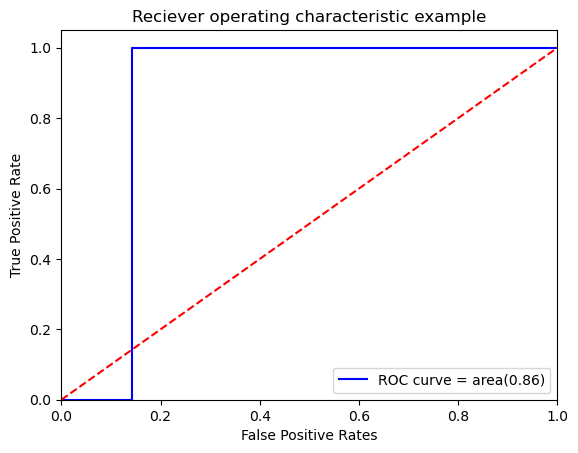

In [24]:
# different false +ve and true +ve rates
log_ROC_AUC = roc_auc_score(y_train, y_predict_train)
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
roc_auc = auc(fpr,tpr)

# this is our test data set
plt.figure()
plt.plot(fpr1,tpr1, color='blue', label='ROC curve = area(%0.2f)' % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# for default value ROC value is blue one

In [25]:
fpr
# gives different false +ve rates

array([0.        , 0.14285714, 0.14285714, 1.        ])

In [26]:
tpr
# gives different true positive rates
# fpr and tpr are values of x&y-axis of ROC Curve
# for different combinations you get different ROC values.

array([0., 0., 1., 1.])

In [27]:
# threshold values are select on which error is better. 
# We choose 35->0.35 as threshold value
from sklearn.preprocessing import binarize
# y_predict_class1 = binarize(y_prob.reshape(1,-1) ,0.5)[0]
y_predict_class1 = binarize(y_prob.reshape(1,-1))[0] # it is wrong
y_predict_class1

# convert array float to int type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

# if your threshold value is low everything will be predicted as positive

array([1, 1])

In [28]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[0 1]
 [0 1]]


In [31]:
from sklearn.preprocessing import binarize
#y_predict_class2 = binarize(y_prob.reshape(1,-1) ''',0.5''')[0]
y_predict_class2 = binarize(y_prob.reshape(1,-1))[0]
y_predict_class2

# convert array float to int type
y_predict_class2 = y_predict_class1.astype(int)
y_predict_class2

array([1, 1])

In [32]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[0 1]
 [0 1]]


In [33]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class2))

# as we increase the threshold valuetrue -ve value increases 
# and true +vevalue decreases specificity increase and sensitivity decreases

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Find the optimal cut-off point(Threshold Value)

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
fpr,tpr,thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)
print("Area under the ROC Curve: %f" % roc_auc)
# area under roc curve for optimal threshold value and nearer to 1 is better 

Area under the ROC Curve: 1.000000


In [38]:
# Get the optimal threshold value
#import numpy as np
#i = np.arange(len(tpr)) # index for df
#roc = pd.DataFrame(('fpr': pd.Series(fpr, index=i), 'tpr': pd.Series(tpr, index=i), '1-fpr': pd.eries(1-fpr, index=i), 'tf':pd.Series(tpr-(1-fpr), index=i),'thresholds': pd.Series(thresholds, index=i)))
#roc.iloc[(roc.tf-0).abs().argsort()[:1]]

In [39]:
import numpy as np
import pandas as pd

# Assuming you have defined fpr, tpr, thresholds, and other required variables

i = np.arange(len(tpr))  # index for df
roc = pd.DataFrame({
    'fpr': pd.Series(fpr, index=i),
    'tpr': pd.Series(tpr, index=i),
    '1-fpr': pd.Series(1 - fpr, index=i),
    'tf': pd.Series(tpr - (1 - fpr), index=i),
    'thresholds': pd.Series(thresholds, index=i)
})

min_tf_idx = (roc['tf'] - 0).abs().argsort()[:1]
selected_row = roc.iloc[min_tf_idx]

print(selected_row)


   fpr  tpr  1-fpr   tf  thresholds
1  0.0  1.0    1.0  0.0    0.180894


[Text(-0.25, 0, ''),
 Text(0.0, 0, ''),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, ''),
 Text(1.25, 0, ''),
 Text(1.5, 0, ''),
 Text(1.75, 0, ''),
 Text(2.0, 0, ''),
 Text(2.25, 0, '')]

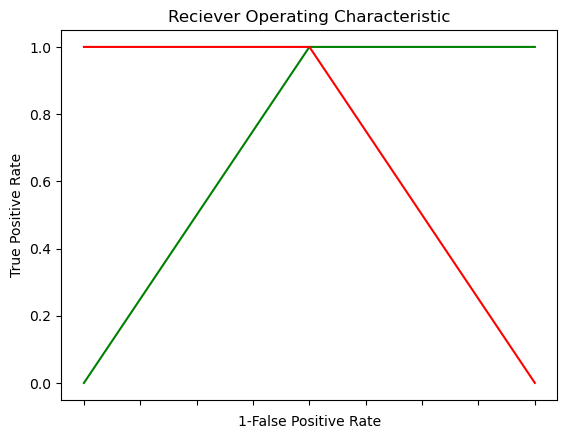

In [40]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'], color='green')
plt.plot(roc['1-fpr'], color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
ax.set_xticklabels([])

In [41]:
# draw near ROC Curve for this optimal value now 
from sklearn.preprocessing import binarize
#y_predict_class2 = binarize(y_prob.reshape(1,-1),0.45)[0]
y_predict_class2 = binarize(y_prob.reshape(1,-1))[0]
y_predict_class2

confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class2))

[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
LogisticRegression?